# 第二章：古典经济学的基本假设

简要介绍古典经济学的核心假设及其在一般均衡与宏观分析中的作用。

## 主要假设
- 假设 1：完全竞争 —— 市场参与者为价格接受者。
- 假设 2：价格与工资的完全灵活性 —— 市场可即时出清。
- 假设 3：边际产出递减 —— 生产函数的性质与要素报酬递减。
- 假设 4：储蓄与投资自动均衡（或通过利率调整）。
- 假设 5：完全信息与可交易性（无交易成本）。

## 数学表示与推导（柯布-道格拉斯示例）
令一般生产函数为 $Y=F(K,L)$，在完全竞争下，生产要素的边际报酬等于要素价格：

- 工资：$w=\dfrac{\partial F}{\partial L}$。
- 利率：$r=\dfrac{\partial F}{\partial K}$。

若取柯布-道格拉斯：$$Y=K^{\alpha}L^{1-\alpha},\;0<\alpha<1,$$ 则：
$$r=\alpha K^{\alpha-1}L^{1-\alpha},\quad w=(1-\alpha)K^{\alpha}L^{-\alpha}.$$

In [14]:
# 运行章节辅助脚本的示例

# 请确保在虚拟环境中已安装 sympy（可选）

import importlib.util

from pathlib import Path



# 尝试在当前工作目录或在上级的 code/ 目录中找到模块文件

p = Path('chapter_2_setup.py')

if not p.exists():

    p = Path('code') / 'chapter_2_setup.py'

if not p.exists():

    raise FileNotFoundError(f'chapter_2_setup.py not found (tried: {Path.cwd() / "chapter_2_setup.py"}, {Path.cwd() / "code/chapter_2_setup.py"})')

spec = importlib.util.spec_from_file_location('chapter_2_setup', str(p.resolve()))

c2 = importlib.util.module_from_spec(spec)

spec.loader.exec_module(c2)

# 运行模块示例（会打印符号表达式和数值示例）

c2.run_example()


Running chapter 2 numeric example...
Symbolic MPK = K**(alpha - 1)*L**(1 - alpha)*alpha
Symbolic MPL = (K/L)**alpha*(1 - alpha)
numeric MPK=0.184672, numeric MPL=0.861801


In [15]:
# 数值评估示例：改变资本-劳动比率观察 MPK 与 MPL
for K,L in [(100,50),(200,50),(100,100)]:
    mpk,mpl = c2.numeric_evaluate(alpha_val=0.3, K_val=float(K), L_val=float(L))
    print(f'K={K}, L={L} -> MPK={mpk:.6f}, MPL={mpl:.6f}')

K=100, L=50 -> MPK=0.184672, MPL=0.861801
K=200, L=50 -> MPK=0.113679, MPL=1.061002
K=100, L=100 -> MPK=0.300000, MPL=0.700000


## 讨论与下一步
- 可在此处加入带名义刚性或价格/工资黏性的扩展示例。
- 下一步：补充参考文献并把关键推导转为交互式图形。

Saved plots: results/ch2_marginal_vsK.png results/ch2_marginal_vsKtoL.png


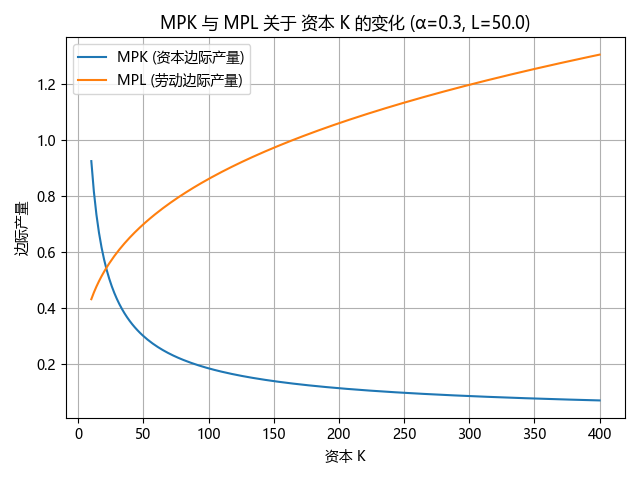

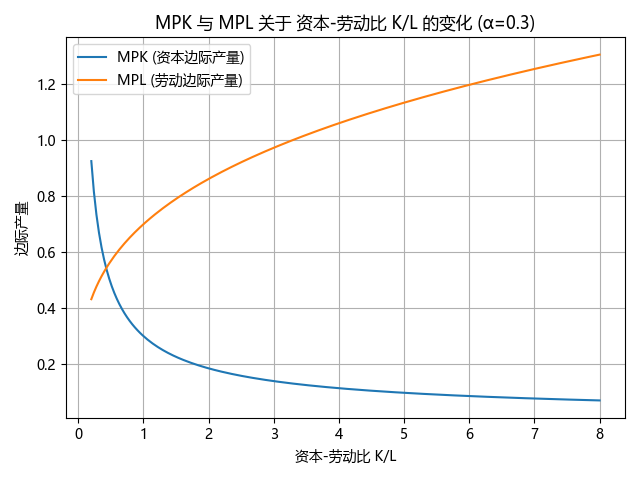

In [16]:
# 绘图示例：生成并显示要素边际产量图像

from IPython.display import Image, display

# 使用文件路径加载模块（与 notebook 中之前相同的安全加载）

import importlib.util

from pathlib import Path

p = Path('chapter_2_setup.py')

if not p.exists():

    p = Path('code') / 'chapter_2_setup.py'

spec = importlib.util.spec_from_file_location('chapter_2_setup', str(p.resolve()))

c2 = importlib.util.module_from_spec(spec)

spec.loader.exec_module(c2)

# 生成并保存图片到 results/，然后显示

files = c2.plot_marginal_products(alpha_val=0.3, L_val=50.0, K_min=10, K_max=400, n=200, out_prefix='results/ch2_marginal')

for f in files:

    display(Image(filename=f))


## 五条假设对应（速览）

- 假设1（完全竞争）：在下文的边际产出推导中已展示 `要素边际产出 = 要素价格` 的结论。
- 假设2（价格与工资完全灵活）：在接下来的价格调整单元中用数值迭代演示了价格如何趋向市场出清（以及价格黏性下不出清的对比）。
- 假设3（边际产出递减）：通过柯布-道格拉斯示例展示了边际产出关于资本/劳动的衰减特性（见前面导出）。
- 假设4（储蓄-投资自动均衡）：添加了 `S(r)` 与 `I(r)` 的数值示例，并绘制交点来说明利率均衡机制。
- 假设5（完全信息/无交易成本）：作为制度性假设在讨论中列出，并在比较单元中示例了引入价格黏性或信息限制的影响。

下面的单元分别包含：价格调整演示、储蓄-投资图、黏性价格对比与结论说明。

Saved price dynamics plots: results/ch2_price_dynamics.png results/ch2_price_dynamics_DS.png


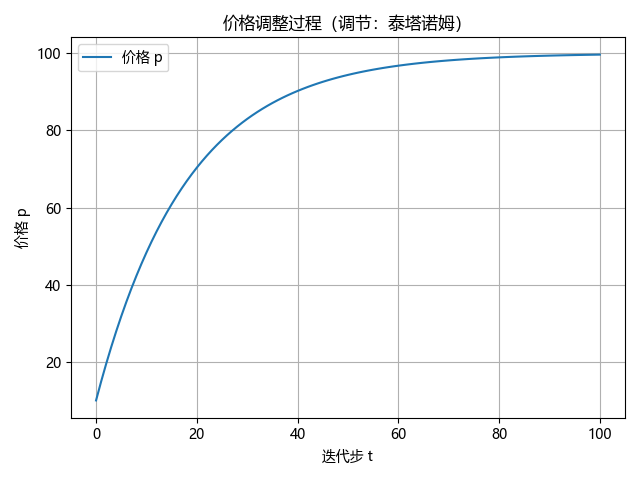

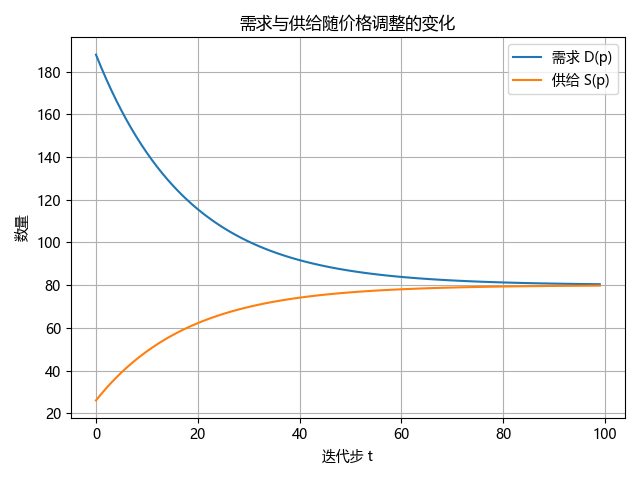

In [17]:
# 价格调整演示（泰塔诺姆）

import importlib.util

from pathlib import Path

from IPython.display import Image, display

p = Path('chapter_2_setup.py')

if not p.exists():

    p = Path('code') / 'chapter_2_setup.py'

spec = importlib.util.spec_from_file_location('chapter_2_setup', str(p.resolve()))

c2 = importlib.util.module_from_spec(spec)

spec.loader.exec_module(c2)

files = c2.plot_price_dynamics(demand_params=(200,1.2), supply_params=(20,0.6), p0=10.0, steps=100, gamma=0.03, out='results/ch2_price_dynamics.png')

for f in files:

    display(Image(filename=f))


Saved S-I plot: results/ch2_SI.png


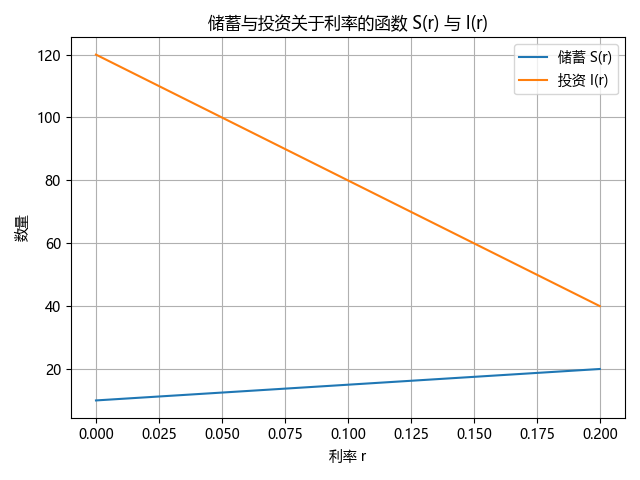

In [18]:
# 储蓄-投资示例：S(r) 与 I(r)

from IPython.display import Image, display

files_si = c2.savings_investment_plot(s_params=(10,50), i_params=(120,400), r_min=0.0, r_max=0.2, n=300, out='results/ch2_SI.png')

display(Image(filename=files_si))


Saved sticky price plot: results/ch2_sticky_high.png
Saved sticky price plot: results/ch2_sticky_low.png


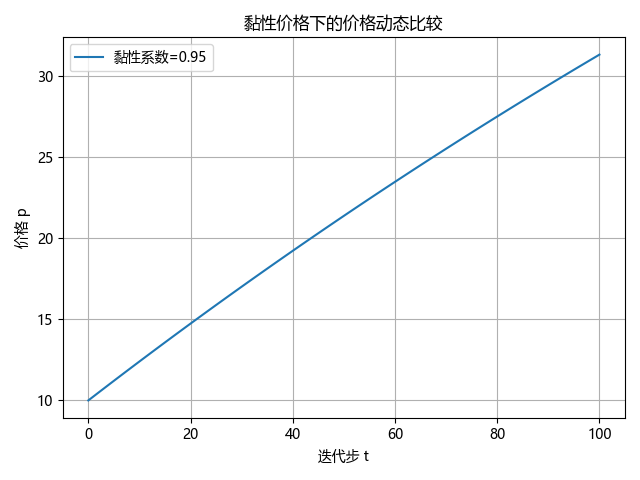

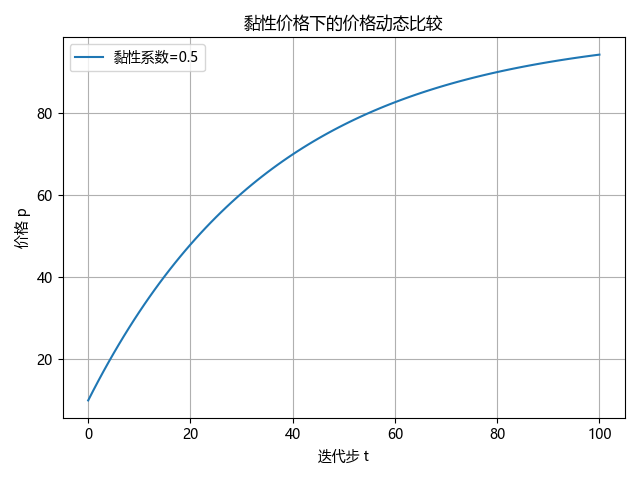

In [19]:
# 价格黏性对比示例

from IPython.display import Image, display

f_sticky1 = c2.simulate_sticky_price(demand_params=(200,1.2), supply_params=(20,0.6), p0=10.0, steps=100, gamma=0.03, stickiness=0.95, out='results/ch2_sticky_high.png')

f_sticky2 = c2.simulate_sticky_price(demand_params=(200,1.2), supply_params=(20,0.6), p0=10.0, steps=100, gamma=0.03, stickiness=0.5, out='results/ch2_sticky_low.png')

display(Image(filename=f_sticky1))

display(Image(filename=f_sticky2))


## 小结与参考文献

- 小结：本章展示并演示了古典经济学的五条基本假设。通过柯布-道格拉斯生产函数、要素边际产出、价格调整（泰塔诺姆）、储蓄-投资均衡图与价格黏性对比，说明了古典假设的含义与在不同假设放松下的变化。

- 参考文献：
  - Mankiw, N. G. (2016). Principles of Economics. （教科书参考）
  - Samuelson, P. A., & Nordhaus, W. D. (2001). Economics.
